In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import visdom

In [3]:
from sklearn.decomposition import PCA

In [4]:
from preprocessing_utils import process_sat_data, pickle_save, pickle_load
from ellipse_3d import transform3d, fit_ellipse

In [5]:
data_train = pd.read_csv('../data/train.csv')
data_test = pd.read_csv('../data/track1/test.csv')

In [6]:
train_data = data_train.copy(deep=True)
test_data = data_test.copy(deep=True)

In [7]:
process_sat_data(train_data, test_data, scale=10000)

In [9]:
cols = ['x_sim', 'y_sim', 'z_sim']

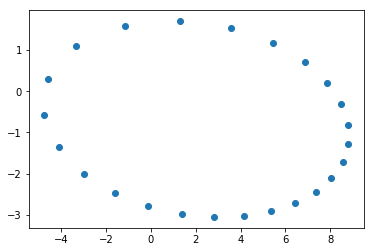

In [10]:
transformed_data = transform3d(train_data, 69, 5, cols)
plt.scatter(transformed_data[:,0], transformed_data[:,1])

In [11]:
model = fit_ellipse(transformed_data)

Final Loss:  5.022628712936239e-08


Major: 6.83281243737907 | Minor: 2.3499693800458674 | Center: (2.0142314434051514,-0.6757811307907104) | Rotation: 176.30022813934383


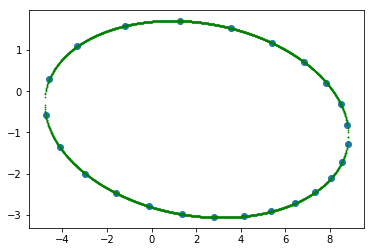

In [12]:
model.plot(transformed_data)

In [35]:
sat_id = 41
sat_data = train_data[train_data['sat_id'] == sat_id]
time = sat_data['epoch'].values
time = time / time[1]

In [37]:
time[:1000]

array([  0.        ,   1.        ,   2.        ,   3.00000073,
         4.00000073,   5.00000073,   6.00000073,   7.00000146,
         8.00000146,   9.00000146,  10.00000146,  11.00000146,
        12.00000219,  13.00000219,  14.00000219,  15.00000219,
        16.00000292,  17.00000292,  18.00000292,  19.00000292,
        20.00000365,  21.00000365,  22.00000365,  23.00000365,
        24.00000365,  25.00000438,  26.00000438,  27.00000438,
        28.00000438,  29.00000511,  30.00000511,  31.00000511,
        32.00000511,  33.00000511,  34.00000584,  35.00000584,
        36.00000584,  37.00000584,  38.00000657,  39.00000657,
        40.00000657,  41.00000657,  42.00000657,  43.0000073 ,
        44.0000073 ,  45.0000073 ,  46.0000073 ,  47.00000803,
        48.00000803,  49.00000803,  50.00000803,  51.00000803,
        52.00000876,  53.00000876,  54.00000876,  55.00000876,
        56.00000949,  57.00000949,  58.00000949,  59.00000949,
        60.00001022,  61.00001022,  62.00001022,  63.00